# Bossting Techniques

1.What is Boosting in Machine Learning?
  - Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) in a sequential manner. Each new model corrects the errors of the previous ones, leading to a strong learner.

2.How does Boosting differ from Bagging?
  - Bagging: Models are trained independently in parallel; reduces variance (e.g., Random Forest).
  - Boosting: Models are trained sequentially with a focus on correcting errors; reduces bias (e.g., AdaBoost, XGBoost).

3.What is the key idea behind AdaBoost?
  - AdaBoost adjusts the weights of training sample after each interation, giving more importance to the misclassified points, so future models focus more on the difficult examples.

4.Explain the working of AdaBoost with an Example?
  - Start with equal weights for all samples.
  - Train a week kearner (e.g., shallow tree).
  - Increase weights of misclassified samples.
  - Train next model using updated weights.
  - Final prediction is a weighted vote of all weak learners.
  Example: If a sppam filter misclassifiers a spam email, that email's weight is increased so that the next model docuded on it.

5.What is Gradient Boosting, and how is it different from AdaBoost?
  - Gradient Boosting minimizes a loss function by adding new models that predict the residual errors(gradients) of previous models.
  - **Difference**:
    - AdaBoost modeifier weights of data points.
    - Gradient Boosting fits new models to residuals (errors) directly.

6.What is the loss function in Graient Boosting?
  - It can vary depending on the task:
    - **Regression**: Mean Squared Error (MSE)
    - **Classificatio**n: Log Loss (Cross-Entropy) The model tries to minimize this loss using fradient descent.

7.How does XGBoost improve over traditional Gradient boosting?
  - Regularization (L1 & L2) to reduce overfitting
  - Tree pruning
  - Parallel processing
  - Handling missing values automatically
  - Faster due to optimized implementation

8.What is the Differencee between XGBoost and CatBoost?
1. **Handling Categorical Features:**

  - **XGBoost**: Requires one-hot encoding or label encoding for categorical features before training. This can lead to increased dimensionality and potential loss of information.
  - **CatBoost**: Handles categorical features automatically using target encoding (also known as ordered boosting). This avoids the need for explicit preprocessing and often improves performance.
2. **Tree Structure:**

   - **XGBoost**: Builds trees using level-wise growth, where all nodes at a level are split before moving to the next level. This can lead to slower training times for large datasets.
   - **CatBoost**: Uses symmetric trees and a depth-wise growth approach. This can lead to faster training and less overfitting. This is also called oblivious trees. This structure helps in preventing overfitting as compared to XGBoost.
3. **Parameter Tuning:**

  - **XGBoost**: Has a larger number of hyperparameters to tune, requiring more experimentation to find optimal settings.
  - **CatBoost**: Has fewer hyperparameters and often requires less tuning to achieve good performance. CatBoost provides the option to use a GPU for training, which significantly reduces training time. This is also called oblivious trees. This structure helps in preventing overfitting as compared to XGBoost.
4. **Prediction Speed:**

  - **XGBoost**: Is generally faster for prediction compared to CatBoost, especially for large datasets.
  - **CatBoost**: Can be slower for prediction due to its more complex tree structure.
5.** Regularization:**

   - **XGBoost**: Uses L1 and L2 regularization to prevent overfitting.
   - **CatBoost**: Uses a novel type of regularization called ordered boosting, which further reduces overfitting.


9.What are some real-word applications od Boosting techniques?
  - Credit scoring
  - Fraud detection
  - Online ad click prediction
  - Medical diagnosis
  - Customer churn prediction
  - Kaggle competitions
  

10.How does regularization help in XGBoost?
  - It penalizes complex tree and high weights, reducing overfitting.
  XGBoost uses **L1(Lasso)** and **L2(Ridge)** regularization on tree leaf weights.

11.What are some hyperparameters to tune i Gradient Boosting models?
  - learning_rate (shrinkage rate)
  - n_estimators (number of boosting rounds)
  - max_depth (depth of trees)
  - subsample (row sampling)
  - colsample_bytree (column sampling)
  - min_child_weight, gamma (XGBoost-specific regularization)

12.What is the concept of Feature Importance in Boosting?
  - It measures how much each feature contributes to model. Boosting models track:
    - Frequency of feature used in splites
    - Gain in performance when split is made using the feature
    - Shapley values for more interpretability

13.Why is CatBoost efficient for categorical data?
  - It used ordered boosting and target encoding with permutation, avoiding data leakage.
  - No need for manual encoding like one-hot, saving memory and improving performance.

# Practical

14.Train an AdaBoost Classifier on a sample dataset and print model accuracy.

In [8]:
# prompt: 14.Train an AdaBoost Classifier on a sample dataset and print model accuracy.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the AdaBoost classifier
ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy}")


AdaBoost Classifier Accuracy: 0.875


15.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [9]:
# prompt: 15.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the AdaBoost regressor
ada_boost_regressor = AdaBoostRegressor(random_state=42)
ada_boost_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost_regressor.predict(X_test)

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"AdaBoost Regressor Mean Absolute Error: {mae}")


AdaBoost Regressor Mean Absolute Error: 48.23397278609185


16.Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

In [10]:
# prompt: 16.Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Print feature importances
feature_importances = gbc.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f"Feature {data.feature_names[i]}: {importance}")


Feature mean radius: 1.292348076813499e-05
Feature mean texture: 0.027804583634348873
Feature mean perimeter: 0.00020118364232095282
Feature mean area: 0.0004254033042015456
Feature mean smoothness: 0.0024666044618570173
Feature mean compactness: 0.0029960469868226245
Feature mean concavity: 0.0009222332874449441
Feature mean concave points: 0.4505275876506107
Feature mean symmetry: 0.0005199404606719796
Feature mean fractal dimension: 0.00010669160100635732
Feature radius error: 0.006870207891017868
Feature texture error: 0.003604013810768886
Feature perimeter error: 0.001156802373414802
Feature area error: 0.008415272506866505
Feature smoothness error: 0.0005564528920603285
Feature compactness error: 0.0025106349835955057
Feature concavity error: 0.013067922820320132
Feature concave points error: 0.0020381084784025583
Feature symmetry error: 0.0007028625799243465
Feature fractal dimension error: 0.004223933303430293
Feature worst radius: 0.075588875185215
Feature worst texture: 0.039

17.Trai a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [11]:
# prompt: 17.Trai a Gradient Boosting Regressor and evaluate using R-Squared Score.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-squared Score: {r2}")


Gradient Boosting Regressor R-squared Score: 0.9268126639292507


18.Train an XGBoot Classifier on a dataset and compare accuracy with Gradient Boosting.

In [12]:
# prompt: 18.Train an XGBoot Classifier on a dataset and compare accuracy with Gradient Boosting.

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbc = gbc.predict(X_test)

# Calculate and print the accuracy for Gradient Boosting
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gbc}")

# Initialize and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate and print the accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")


Gradient Boosting Classifier Accuracy: 0.915
XGBoost Classifier Accuracy: 0.895


19.Train a CatBoost Classifier and evaluate using F1-Score.

In [13]:
# prompt: 19.Train a CatBoost Classifier and evaluate using F1-Score.

!pip install catboost

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0, random_seed=42)
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Calculate and print the F1-score
f1 = f1_score(y_test, y_pred)
print(f"CatBoost Classifier F1-Score: {f1}")


CatBoost Classifier F1-Score: 0.8921568627450981


20.Train an XGBoos Regressor and evaluate using Mean Squared Error (MSE).

In [14]:
# prompt: 20.Train an XGBoos Regressor and evaluate using Mean Squared Error (MSE).

from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regressor Mean Squared Error: {mse}")


XGBoost Regressor Mean Squared Error: 1709.6566968047127


21.Train anAdaBoost Classifier and visualize feature importance.

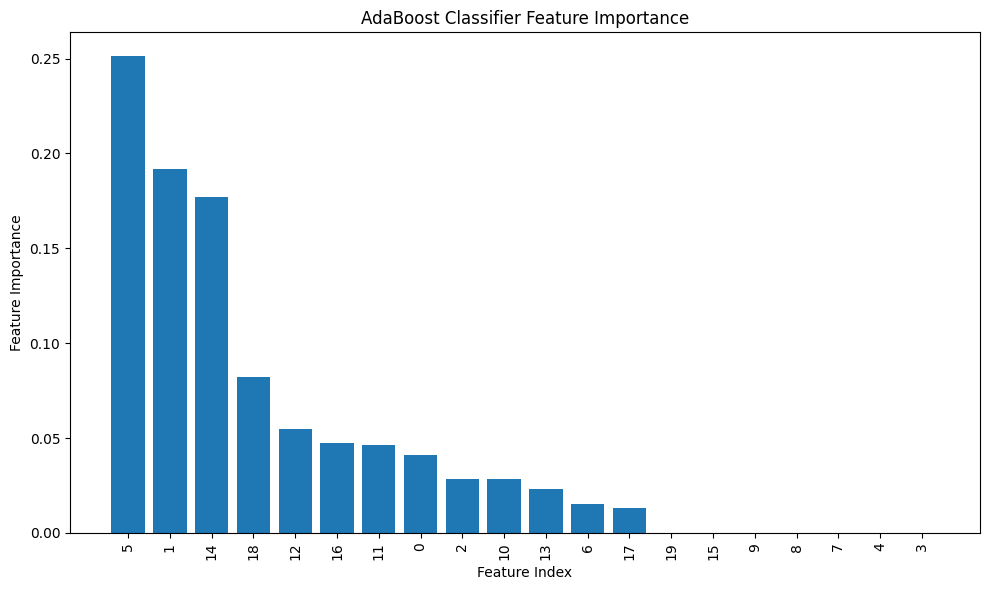

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ada_boost was trained on a dataset with 20 features
# and X currently represents a dataset with 10 features,
# we need to get the correct dataset for visualization.

# Replace X.shape[1] with the correct number of features (20)
num_features = ada_boost.feature_importances_.shape[0]  # Get the number of features from ada_boost

# Get feature importances
feature_importances = ada_boost.feature_importances_

# Create a bar plot of feature importances
indices = np.argsort(feature_importances)[::-1]  # Sort feature importances in descending order

plt.figure(figsize=(10, 6))
plt.title("AdaBoost Classifier Feature Importance")

# Use num_features instead of X.shape[1] for the bar plot
plt.bar(range(num_features), feature_importances[indices])

plt.xticks(range(num_features), indices, rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()

22.Train a Gradient Boosting Regreesor and plot learning curves.

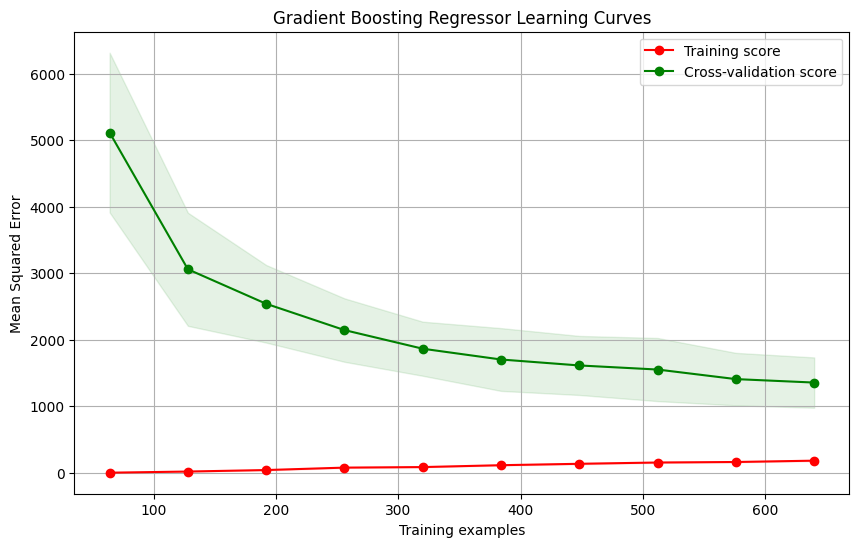

In [17]:
# prompt: 22.Train a Gradient Boosting Regreesor and plot learning curves.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Regressor Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.grid()
plt.show()

23.Train an XGBoost Classifier and visualize feature importance.

In [18]:
# prompt: 23.Train an XGBoost Classifier and visualize feature importance.

import matplotlib.pyplot as plt
import numpy as np
# Initialize and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Create a bar plot of feature importances
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("XGBoost Classifier Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), indices, rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665
 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683
 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701
 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719
 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737
 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755
 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773
 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791
 792 793 794 795 796 797 798 799], got [-4.49011291e+02 -4.15648277e+02 -3.63603327e+02 -3.56110566e+02
 -3.30847686e+02 -3.27898053e+02 -3.24679353e+02 -3.20897110e+02
 -3.19038411e+02 -3.17338648e+02 -3.09217413e+02 -3.08413813e+02
 -3.07836322e+02 -3.04947828e+02 -2.90450078e+02 -2.88801880e+02
 -2.84334531e+02 -2.76018158e+02 -2.75613238e+02 -2.75244059e+02
 -2.70944329e+02 -2.65846884e+02 -2.63325804e+02 -2.62593616e+02
 -2.62341193e+02 -2.56400270e+02 -2.51304669e+02 -2.51226019e+02
 -2.49892646e+02 -2.45882044e+02 -2.44245534e+02 -2.41000981e+02
 -2.40963415e+02 -2.40437548e+02 -2.40039526e+02 -2.34098014e+02
 -2.30741697e+02 -2.28987903e+02 -2.26085293e+02 -2.24913872e+02
 -2.23854161e+02 -2.22853075e+02 -2.22570613e+02 -2.22252418e+02
 -2.18982204e+02 -2.18925052e+02 -2.18450261e+02 -2.17508681e+02
 -2.15114415e+02 -2.14993569e+02 -2.13806945e+02 -2.13553292e+02
 -2.12630408e+02 -2.07993173e+02 -2.06993735e+02 -2.05048765e+02
 -2.04751383e+02 -2.04741875e+02 -2.04560657e+02 -2.03100878e+02
 -2.02840070e+02 -2.00965776e+02 -1.95757174e+02 -1.95028942e+02
 -1.93333233e+02 -1.92737668e+02 -1.89801834e+02 -1.88679368e+02
 -1.87199941e+02 -1.87047428e+02 -1.86249421e+02 -1.85424828e+02
 -1.85158394e+02 -1.84440003e+02 -1.83464498e+02 -1.81717402e+02
 -1.80792532e+02 -1.74301563e+02 -1.73362927e+02 -1.72755833e+02
 -1.71246424e+02 -1.70551393e+02 -1.69402036e+02 -1.69399822e+02
 -1.69212517e+02 -1.69165729e+02 -1.68232673e+02 -1.65734881e+02
 -1.61613042e+02 -1.61222913e+02 -1.60543159e+02 -1.60329917e+02
 -1.58748177e+02 -1.58320124e+02 -1.58098861e+02 -1.56426320e+02
 -1.54978206e+02 -1.54137296e+02 -1.53370687e+02 -1.53362497e+02
 -1.51367962e+02 -1.50432508e+02 -1.50071132e+02 -1.49707997e+02
 -1.48762751e+02 -1.48613070e+02 -1.47498633e+02 -1.45188546e+02
 -1.44956654e+02 -1.43588402e+02 -1.42737458e+02 -1.41600240e+02
 -1.40380008e+02 -1.40067214e+02 -1.39971416e+02 -1.39561642e+02
 -1.38713870e+02 -1.38368380e+02 -1.37196293e+02 -1.36777123e+02
 -1.34061177e+02 -1.33573100e+02 -1.33228544e+02 -1.31672316e+02
 -1.31279025e+02 -1.31196076e+02 -1.30335519e+02 -1.30192029e+02
 -1.29325689e+02 -1.28778846e+02 -1.28636417e+02 -1.28566733e+02
 -1.26874887e+02 -1.26846941e+02 -1.26249491e+02 -1.25388493e+02
 -1.24959441e+02 -1.24653190e+02 -1.23056119e+02 -1.22560537e+02
 -1.22469069e+02 -1.21529459e+02 -1.21219603e+02 -1.20858848e+02
 -1.19690555e+02 -1.18586946e+02 -1.17993352e+02 -1.17484465e+02
 -1.16644975e+02 -1.15541354e+02 -1.15326361e+02 -1.14146833e+02
 -1.13646030e+02 -1.12295603e+02 -1.11683205e+02 -1.11649488e+02
 -1.11575069e+02 -1.10900700e+02 -1.10780837e+02 -1.10609910e+02
 -1.10397913e+02 -1.09424590e+02 -1.08586194e+02 -1.07959724e+02
 -1.07812302e+02 -1.07401087e+02 -1.07346872e+02 -1.04990534e+02
 -1.04410655e+02 -1.04218197e+02 -1.03585396e+02 -1.01633200e+02
 -1.00420622e+02 -9.69268454e+01 -9.65370607e+01 -9.56604738e+01
 -9.47201192e+01 -9.45222784e+01 -9.38061151e+01 -9.37306861e+01
 -9.31809180e+01 -9.19670206e+01 -9.13382761e+01 -8.97296930e+01
 -8.96331905e+01 -8.87069560e+01 -8.86375943e+01 -8.84705572e+01
 -8.71959554e+01 -8.65927523e+01 -8.64913817e+01 -8.56902514e+01
 -8.37719721e+01 -8.34480565e+01 -8.34045348e+01 -8.32556878e+01
 -8.31422610e+01 -8.28508443e+01 -8.21238615e+01 -8.17877699e+01
 -8.15427407e+01 -8.00573371e+01 -7.96740596e+01 -7.96214823e+01
 -7.95574177e+01 -7.92147024e+01 -7.87845400e+01 -7.84914472e+01
 -7.83456593e+01 -7.74869675e+01 -7.73079093e+01 -7.66612864e+01
 -7.60618906e+01 -7.59898486e+01 -7.59097596e+01 -7.55229877e+01
 -7.49402142e+01 -7.45299128e+01 -7.42271430e+01 -7.38723622e+01
 -7.37366972e+01 -7.32841368e+01 -7.30183582e+01 -7.28066140e+01
 -7.27438293e+01 -7.25736597e+01 -7.16772001e+01 -7.14296188e+01
 -7.11807342e+01 -7.03843726e+01 -7.02421638e+01 -7.01969601e+01
 -6.96318923e+01 -6.93356608e+01 -6.90648678e+01 -6.88257518e+01
 -6.86116445e+01 -6.85681506e+01 -6.74307502e+01 -6.72943073e+01
 -6.64832403e+01 -6.64722980e+01 -6.55852184e+01 -6.54281381e+01
 -6.53127033e+01 -6.52959972e+01 -6.52319200e+01 -6.45150284e+01
 -6.38118091e+01 -6.33400962e+01 -6.29556571e+01 -6.24041414e+01
 -6.22472169e+01 -6.17776741e+01 -6.15348065e+01 -6.13159021e+01
 -6.07218875e+01 -6.06922904e+01 -6.02705835e+01 -5.92809081e+01
 -5.90512407e+01 -5.87409005e+01 -5.84081733e+01 -5.82781006e+01
 -5.81761382e+01 -5.79820831e+01 -5.77241798e+01 -5.67272541e+01
 -5.63643259e+01 -5.62899689e+01 -5.44133813e+01 -5.42108890e+01
 -5.38262232e+01 -5.29469783e+01 -5.25758634e+01 -5.24570368e+01
 -5.22846510e+01 -5.03061321e+01 -5.02392356e+01 -4.98683977e+01
 -4.97053515e+01 -4.90746072e+01 -4.81804590e+01 -4.78916374e+01
 -4.77937388e+01 -4.74401471e+01 -4.73050325e+01 -4.67136720e+01
 -4.63729576e+01 -4.58944191e+01 -4.37639810e+01 -4.29529075e+01
 -4.23161924e+01 -4.18050593e+01 -4.13931823e+01 -4.13183725e+01
 -4.05979419e+01 -4.05886960e+01 -3.98422446e+01 -3.93697356e+01
 -3.93145676e+01 -3.91303803e+01 -3.89066233e+01 -3.78387694e+01
 -3.73631135e+01 -3.72012436e+01 -3.71282264e+01 -3.67071477e+01
 -3.61578114e+01 -3.59775140e+01 -3.56174833e+01 -3.56061686e+01
 -3.47204079e+01 -3.34201965e+01 -3.29672513e+01 -3.20243212e+01
 -3.18520181e+01 -3.14325177e+01 -3.09563712e+01 -3.02627998e+01
 -3.02264529e+01 -2.98010936e+01 -2.84350064e+01 -2.82865231e+01
 -2.76650250e+01 -2.76115351e+01 -2.74239772e+01 -2.73060851e+01
 -2.60540707e+01 -2.55767125e+01 -2.51635888e+01 -2.51428731e+01
 -2.49912298e+01 -2.46700623e+01 -2.39728562e+01 -2.35072231e+01
 -2.34454272e+01 -2.33460223e+01 -2.32704094e+01 -2.26716644e+01
 -2.20002836e+01 -2.18735391e+01 -2.14689504e+01 -2.14226812e+01
 -2.11938025e+01 -2.09062890e+01 -2.08215270e+01 -1.99751050e+01
 -1.90782166e+01 -1.88172665e+01 -1.70150343e+01 -1.69008596e+01
 -1.64198761e+01 -1.63222318e+01 -1.60082355e+01 -1.53482089e+01
 -1.39383877e+01 -1.35185049e+01 -1.34380306e+01 -1.31037119e+01
 -1.28796587e+01 -1.27933067e+01 -1.22614878e+01 -1.16040775e+01
 -1.01218243e+01 -9.27971897e+00 -8.64382792e+00 -8.61922296e+00
 -8.04639099e+00 -7.88798916e+00 -7.88489916e+00 -6.61746670e+00
 -6.15890011e+00 -5.99956768e+00 -5.93866885e+00 -5.89968454e+00
 -5.75075652e+00 -5.67507330e+00 -5.44888341e+00 -5.36618419e+00
 -5.31825197e+00 -5.24437874e+00 -5.08489821e+00 -4.74622231e+00
 -4.55911807e+00 -4.40636826e+00 -4.14108810e+00 -3.59894509e+00
 -3.09943771e+00 -3.07158522e+00 -2.29444157e+00 -3.83525925e-01
  3.33170183e-01  5.51058344e-01  7.80643276e-01  8.06482363e-01
  1.24867379e+00  2.10305098e+00  2.39228827e+00  3.99599292e+00
  4.65140314e+00  4.66596061e+00  4.99574688e+00  5.16450291e+00
  5.71892839e+00  6.01472156e+00  6.33879032e+00  6.71909770e+00
  7.16747503e+00  8.05403095e+00  8.30538572e+00  8.32990308e+00
  9.15478233e+00  9.31701342e+00  9.57503987e+00  9.67834284e+00
  1.03920534e+01  1.07681455e+01  1.13859156e+01  1.16187260e+01
  1.21114704e+01  1.31276649e+01  1.32882887e+01  1.35927485e+01
  1.41039430e+01  1.41881736e+01  1.46074174e+01  1.60465416e+01
  1.60838501e+01  1.64807919e+01  1.66620220e+01  1.68496585e+01
  1.72002871e+01  1.72432104e+01  1.75721555e+01  1.79523181e+01
  1.81583351e+01  1.84903452e+01  1.85182051e+01  1.85698293e+01
  1.92925713e+01  1.94411798e+01  2.00222057e+01  2.00564941e+01
  2.04941141e+01  2.06263788e+01  2.14633468e+01  2.24688319e+01
  2.27384246e+01  2.30708902e+01  2.31765273e+01  2.37973163e+01
  2.48617960e+01  2.49233237e+01  2.52009213e+01  2.59153507e+01
  2.59207361e+01  2.59862033e+01  2.64804191e+01  2.65224030e+01
  2.71790635e+01  2.73531207e+01  2.73580979e+01  2.82903344e+01
  2.89241001e+01  2.91691715e+01  2.99732872e+01  3.16386678e+01
  3.26933894e+01  3.27271995e+01  3.27785343e+01  3.31155618e+01
  3.41258594e+01  3.42817576e+01  3.44516602e+01  3.47009476e+01
  3.48669925e+01  3.62845153e+01  3.64131648e+01  3.68140373e+01
  3.69704818e+01  3.76425597e+01  3.79113340e+01  3.84120627e+01
  3.90613068e+01  3.90914693e+01  3.96453818e+01  3.99534241e+01
  3.99831956e+01  4.06395870e+01  4.10725919e+01  4.14203853e+01
  4.15732918e+01  4.18571341e+01  4.18908844e+01  4.19201122e+01
  4.21526401e+01  4.25155990e+01  4.34485501e+01  4.35900512e+01
  4.37044872e+01  4.43138529e+01  4.48196779e+01  4.53540750e+01
  4.59151522e+01  4.67206400e+01  4.71279685e+01  4.75277630e+01
  4.77213182e+01  4.91600294e+01  4.91890909e+01  4.96837441e+01
  5.06909543e+01  5.09651035e+01  5.13533676e+01  5.14112673e+01
  5.17178729e+01  5.18832774e+01  5.22392844e+01  5.24825633e+01
  5.26730291e+01  5.31887854e+01  5.32405400e+01  5.33422057e+01
  5.35961730e+01  5.41687163e+01  5.45949395e+01  5.52217294e+01
  5.55645766e+01  5.62169088e+01  5.63084005e+01  5.78030022e+01
  5.80836140e+01  5.82351962e+01  6.02512124e+01  6.03091029e+01
  6.08444353e+01  6.14290068e+01  6.15256725e+01  6.18318765e+01
  6.24246981e+01  6.29291423e+01  6.31341639e+01  6.35912592e+01
  6.36911992e+01  6.41303664e+01  6.44849623e+01  6.49030012e+01
  6.52019934e+01  6.55166111e+01  6.57671835e+01  6.63631228e+01
  6.64249366e+01  6.68113857e+01  6.71375884e+01  6.71394050e+01
  6.79114061e+01  6.80506994e+01  6.89321244e+01  6.95142966e+01
  6.99847792e+01  7.02393941e+01  7.03259880e+01  7.03353731e+01
  7.06396203e+01  7.07043485e+01  7.08550824e+01  7.12746676e+01
  7.14951932e+01  7.15518296e+01  7.17465687e+01  7.17756742e+01
  7.28077472e+01  7.44062599e+01  7.55675068e+01  7.59122039e+01
  7.59817754e+01  7.61993765e+01  7.63459987e+01  7.73589439e+01
  7.74378782e+01  7.76932747e+01  7.86511631e+01  7.92606083e+01
  7.94671385e+01  7.97006561e+01  8.00690499e+01  8.04362610e+01
  8.05589605e+01  8.14704511e+01  8.17476742e+01  8.18709245e+01
  8.29175575e+01  8.35222401e+01  8.36354616e+01  8.38603200e+01
  8.40948252e+01  8.57295135e+01  8.64809979e+01  8.68302739e+01
  8.73539258e+01  8.73710227e+01  8.80319720e+01  8.88611074e+01
  9.03307346e+01  9.15841902e+01  9.16244387e+01  9.16314929e+01
  9.18183360e+01  9.35377793e+01  9.36028303e+01  9.39554294e+01
  9.47386124e+01  9.53814731e+01  9.62752362e+01  9.63867421e+01
  9.66165699e+01  9.76373494e+01  9.78821588e+01  9.82154675e+01
  9.86182355e+01  9.86412038e+01  9.94077662e+01  9.97506802e+01
  1.00161943e+02  1.00629422e+02  1.00896473e+02  1.02494212e+02
  1.02584477e+02  1.03238375e+02  1.04857975e+02  1.05647109e+02
  1.05892382e+02  1.05896037e+02  1.06205029e+02  1.06355461e+02
  1.06632828e+02  1.07682192e+02  1.08327187e+02  1.08663952e+02
  1.08721847e+02  1.09060633e+02  1.09752879e+02  1.09907604e+02
  1.10041943e+02  1.10461771e+02  1.11197428e+02  1.12136801e+02
  1.12787010e+02  1.13358509e+02  1.13870944e+02  1.14267518e+02
  1.14619229e+02  1.14678249e+02  1.16837747e+02  1.17278655e+02
  1.17584945e+02  1.18186374e+02  1.19653258e+02  1.20217596e+02
  1.20428233e+02  1.21592007e+02  1.21908601e+02  1.22841586e+02
  1.23180819e+02  1.24337600e+02  1.24894705e+02  1.26366742e+02
  1.26973690e+02  1.27771043e+02  1.28380399e+02  1.28691671e+02
  1.29026154e+02  1.29826537e+02  1.30713010e+02  1.30839469e+02
  1.31191580e+02  1.31988301e+02  1.32768837e+02  1.33145958e+02
  1.34544763e+02  1.34653310e+02  1.35922585e+02  1.36568283e+02
  1.36612173e+02  1.36801190e+02  1.37653981e+02  1.38181951e+02
  1.38407162e+02  1.40376617e+02  1.40405790e+02  1.40892793e+02
  1.41547722e+02  1.43022600e+02  1.43138870e+02  1.43780733e+02
  1.44091407e+02  1.45070122e+02  1.47315082e+02  1.48279202e+02
  1.48876676e+02  1.49560116e+02  1.49562486e+02  1.50105462e+02
  1.50590468e+02  1.51938513e+02  1.52130675e+02  1.55362746e+02
  1.57206007e+02  1.58105957e+02  1.58341975e+02  1.59573135e+02
  1.59674235e+02  1.61408389e+02  1.61756769e+02  1.62612807e+02
  1.64077263e+02  1.64841058e+02  1.65367912e+02  1.66423494e+02
  1.66546496e+02  1.67764675e+02  1.68084896e+02  1.68295756e+02
  1.69435317e+02  1.70787940e+02  1.72331132e+02  1.72398927e+02
  1.74094884e+02  1.76121885e+02  1.76299452e+02  1.76544648e+02
  1.76630189e+02  1.76903044e+02  1.78208263e+02  1.80240582e+02
  1.80329967e+02  1.83698733e+02  1.84474735e+02  1.85358268e+02
  1.85700298e+02  1.90742490e+02  1.90879193e+02  1.91690144e+02
  1.92890337e+02  1.93826203e+02  1.94584375e+02  1.95144397e+02
  1.96927388e+02  1.98697579e+02  2.00654149e+02  2.02334265e+02
  2.02450519e+02  2.07263072e+02  2.09202357e+02  2.09822464e+02
  2.10862963e+02  2.11593555e+02  2.12009152e+02  2.12818265e+02
  2.12962327e+02  2.13357836e+02  2.14084552e+02  2.15496421e+02
  2.20877486e+02  2.26018896e+02  2.29172081e+02  2.30517671e+02
  2.38319470e+02  2.41811081e+02  2.44606482e+02  2.44634846e+02
  2.45320817e+02  2.45483587e+02  2.49132346e+02  2.52574008e+02
  2.54483115e+02  2.54599937e+02  2.59079781e+02  2.59109294e+02
  2.59926341e+02  2.61477666e+02  2.62356651e+02  2.63697173e+02
  2.65104565e+02  2.65974732e+02  2.71277669e+02  2.76173481e+02
  2.83046104e+02  2.87242591e+02  2.90951075e+02  2.91143405e+02
  2.95991508e+02  3.14961317e+02  3.15745561e+02  3.20345189e+02
  3.20482692e+02  3.61020669e+02  3.97646182e+02  4.11142652e+02]

24.Train a CatBoost Classifier and plot the confusion matrix.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


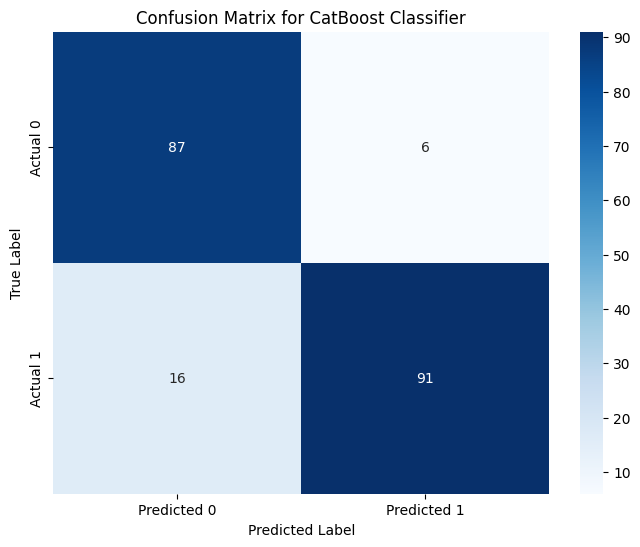

In [5]:
# prompt: 24.Train a CatBoost Classifier and plot the confusion matrix.

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0, random_seed=42)
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CatBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

AdaBoost Classifier Accuracy (n_estimators=50): 0.875
AdaBoost Classifier Accuracy (n_estimators=100): 0.865
AdaBoost Classifier Accuracy (n_estimators=200): 0.865
AdaBoost Classifier Accuracy (n_estimators=500): 0.865


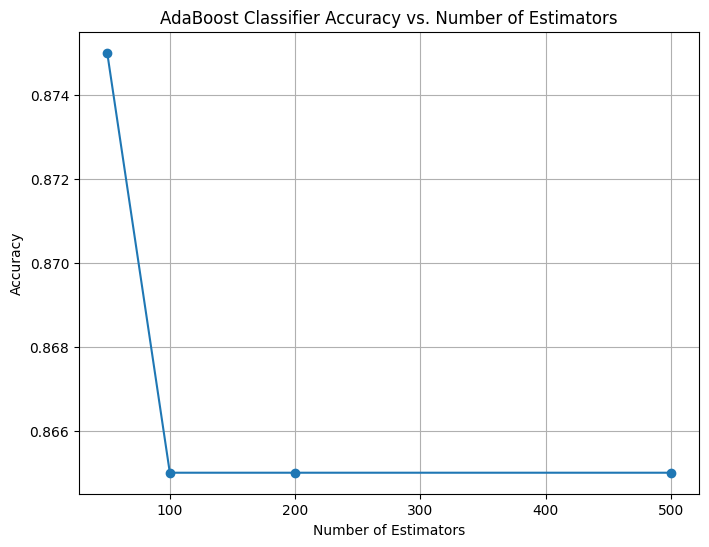

In [6]:
# prompt: 25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

# 25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of estimators to try
n_estimators_list = [50, 100, 200, 500]
accuracies = []

for n_estimators in n_estimators_list:
    # Initialize and train AdaBoost with different n_estimators
    ada_boost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    ada_boost.fit(X_train, y_train)
    y_pred = ada_boost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"AdaBoost Classifier Accuracy (n_estimators={n_estimators}): {accuracy}")

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier Accuracy vs. Number of Estimators")
plt.grid(True)
plt.show()


26.Train a Gradient Boosting Classifier and visualize the ROC curve.

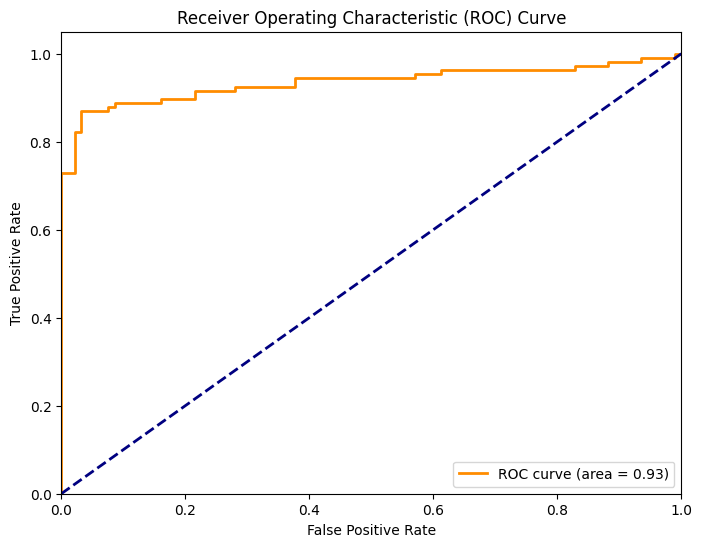

In [1]:
# prompt: 26.Train a Gradient Boosting Classifier and visualize the ROC curve.

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier # Importing the GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


# Generate a sample dataset (if you don't have one already)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42) # Initializing and training gbc
gbc.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = gbc.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

27.Train an XGBoosting Regressor and tune the learning rate using GridSearchCV.

In [2]:
# prompt: 27.Train an XGBoosting Regressor and tune the learning rate using GridSearchCV.

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression # Importing make_regression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Define the parameter grid for learning rate
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (Negative Mean Squared Error):", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Best Hyperparameters: {'learning_rate': 0.1}
Best Score (Negative Mean Squared Error): -2105.5393575911244
Mean Squared Error on Test Set: 1492.4694369143212


28.Train a CatBoosting Classifier on an imbalanced dataset and compare performance with class weighting.

In [20]:
!pip install catboost

In [22]:
# prompt: 28.Train a CatBoosting Classifier on an imbalanced dataset and compare performance with class weighting.

# Generate an imbalanced dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5,
                           n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost without class weights
from catboost import CatBoostClassifier
model_no_weights = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0, random_seed=42)
model_no_weights.fit(X_train, y_train)

# Train CatBoost with class weights
# Instead of class_weights, use the 'weight' parameter during fit
model_with_weights = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0, random_seed=42)
# Compute sample weights based on class weights
sample_weights = [0.1 if label == 0 else 0.9 for label in y_train]
# and pass them to

29.Train an AdaBoosting Classifier and analyze the effect of different learning rates.

In [4]:
# prompt: 29.Train an AdaBoosting Classifier and analyze the effect of different learning rates.

# Generate a sample dataset
from sklearn.datasets import make_classification # Importing make_classification
from sklearn.model_selection import train_test_split
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.1, 1.0]
for learning_rate in learning_rates:
    # Initialize and train the AdaBoost classifier with different learning rates
    ada_boost = AdaBoostClassifier(learning_rate=learning_rate, random_state=42)
    ada_boost.fit(X_train, y_train)
    y_pred = ada_boost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"AdaBoost Classifier Accuracy (learning_rate={learning_rate}): {accuracy}")

AdaBoost Classifier Accuracy (learning_rate=0.01): 0.86
AdaBoost Classifier Accuracy (learning_rate=0.1): 0.86
AdaBoost Classifier Accuracy (learning_rate=1.0): 0.875


30.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [1]:
# prompt: 30.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

# Generate a multi-class classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=3, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softprob', num_class=3, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
y_pred_proba = xgb_classifier.predict_proba(X_test)

# Calculate log loss
logloss = log_loss(y_test, y_pred_proba)
print(f"XGBoost Classifier Log Loss: {logloss}")


XGBoost Classifier Log Loss: 0.40312915577356334
